# Binary star evolution and binary black holes 

#### Authors: 
* Breccia Alessandro ( 2076713 ) 
* Chiloiro Marco ( 2087630 )
* Lui Riccardo ( 1187686 )
* Panagiotakis Kostantinos ( 2081260 )

As the LIGO detectors obtained the first direct detection of gravitational waves, associated with the merger of two black holes (BHs), the latter became a crucial argument to analyze more in deep. We will restrict our attention to the stellar-born ones, leaving aside primordials BHs. A binary black holes (BBH) system usually originates from a binary star system, which can undergo several different evolution processes to arrive at its final state (BBH). 

We will analyze two of them:
* **Common Envelope (CE)**
* **Stable Mass Transfer (SMT)**

### **Common Envelope**
If mass transfer is dynamically unstable or both stars overfill their Roche lobe, then the binary is expected to:

- merge – if the donor lacks a steep density gradient between the core and the envelope

- enter common envelope (CE) – if the donor has a clear distinction between core and envelope, where the two stellar cores of the binary are embedded within the same envelope and they start spiraling in as an effect of the drag exerted by the envelope




<div>
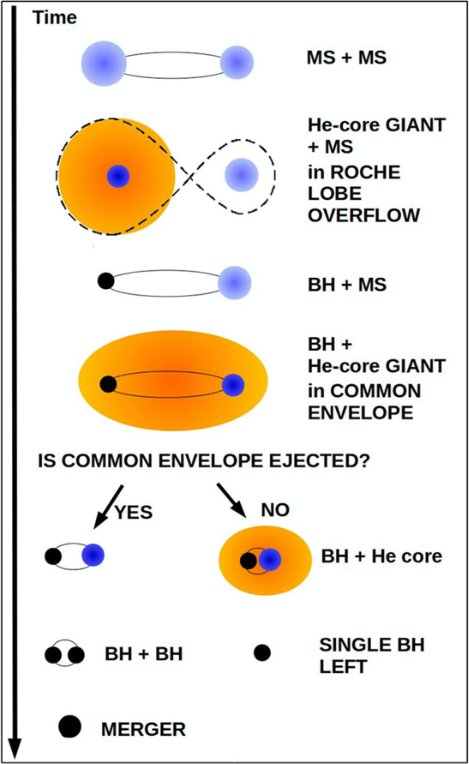  
</div>


### Stable Mass Transfer (SMT)

- If two stars exchange matter to each other, it means they undergo a mass transfer episode. This might be driven either by stellar winds or by an episode of Roche-lobe filling

- When a massive star loses mass by stellar winds, its companion might be able to capture some of this mass 

- Mass transfer by Roche lobe overflow is usually more efficient than wind accretion 

### Roche lobe

- The Roche lobe of a star in a binary system is a teardrop-shaped equipotential surface surrounding the star 

- The Roche lobes of the two members of the binary are connected in just one point, which is the Lagrangian L1 point

- If a star overfills its Roche lobe, a part of its mass flows toward the companion star

<div>
<img style="float: left;" src="roche_lobe.png" width="800"/>  
</div>

### Summary of the isolated binary formation channel

- Initially, the two stars are both on the main sequence (MS) 

- The most massive star becomes a giant star with a helium core and a large hydrogen envelope

- If its radius equals the Roche lobe, the system starts a stable mass-transfer episode. Some mass is lost by the system, some is transferred to the companion. 

- After several additional evolutionary stages, the primary member collapses to a BH

- When the secondary also leaves the MS, growing in radius, the system enters a CE phase: the BH and the helium core spiral in

- If the orbital energy and the thermal energy of the envelope are not sufficient to unbind the envelope, then the BH merges with the helium core leaving a single BH

- In contrast, if the envelope is ejected, we are left with a new binary system, composed of the BH and of a stripped naked helium star. the system evolves into a tight BBH, which might merge within a Hubble time


# Data description

#### Definitions of columns

* Column 0: identifier of the binary

* Column 1: initial mass (ZAMS mass) of the primary member of the binary system in Msun.

* Column 2: initial mass (ZAMS mass) of the secondary member of the binary system in Msun.

* Column 3: mass of the black hole that forms from the primary member (Msun)

* Column 4: mass of the black hole that forms from the secondary member (Msun)

* Column 5: mass of the merger remnant of the two black holes (Msun). In these simulations, it is just the sum of the masses of the two black holes. 1

* Column 6: delay time, i.e. time elapsed from the formation of the binary system to the merger of the two black holes (in Myr)

* Column 7: semi-major axis of the binary system at the formation of the second- born black hole (in solar radii, Rsun = 6.95e10 cm)

* Column 8: orbital eccentricity of the binary system at the formation of the second- born black hole

* Column 9: magnitude of the supernova kick (km/s) associated with the primary member

* Column 10: magnitude of the supernova kick (km/s) associated with the secondary member

* Column 11: cosine of the tilt angle between the orbital angular momentum of the binary system before and after the supernova explosion of the primary member

* Column 12: cosine of the tilt angle between the orbital angular momentum of the binary system before and after the supernova explosion of the secondary member

* Column 13: x component of the centre-of-mass velocity of the binary system after the supernova explosion of the primary component

* Column 14: y component of the centre-of-mass velocity of the binary system after the supernova explosion of the primary component

* Column 15: z component of the centre-of-mass velocity of the binary system after the supernova explosion of the primary component

* Column 16: x component of the centre-of-mass velocity of the binary system after the supernova explosion of the secondary component

* Column 17: y component of the centre-of-mass velocity of the binary system after the supernova explosion of the secondary component

* Column 18: z component of the centre-of-mass velocity of the binary system after the supernova explosion of the secondary component

* Column 19: time at which the primary component undergoes a supernova

* Column 20: time at which the secondary component undergoes a supernova

* Column 21: Boolean variable indicating whether the binary system undergoes a common envelope (True). If column 21 is False, the binary goes via stable mass transfer instead of a common envelope.

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
#import sklearn as sk
%matplotlib inline

### Data import

In [2]:
#location of the first file (the column names are all equal within the files)
#change location to personal one
loc = 'Data/A0.5/MTCE_BBHs_0.02.txt'
#original names (headers)
or_columns = pd.read_csv(loc, sep=' ', skiprows=2, nrows=0).columns.tolist()
#remove from the names the prefix 'colxx:'
columns = [or_columns[i][6:] for i in range(10)]
columns += [or_columns[i][7:] for i in range(10,len(or_columns))]
columns

['ID',
 'm1ZAMS/Msun',
 'm2ZAMS/Msun',
 'm1rem/Msun',
 'm2rem/Msun',
 'm1rem+m2rem/Msun',
 'delay_time/Myr',
 'sma/Rsun',
 'ecc',
 'kick/kms',
 'kick/kms',
 'cmu1',
 'cmu2',
 'v1x/kms',
 'v1y/kms',
 'v1z/kms',
 'v2x/kms',
 'v2y/kms',
 'v2z/kms',
 'time_SN1/Myr',
 'time_SN2/Myr',
 'CE']

# Most important features of dataset suggested by professor Mapelli

* Column 1: initial mass (ZAMS mass) of the primary member of the binary system in Msun.

* Column 2: initial mass (ZAMS mass) of the secondary member of the binary system in Msun.

* Column 3: mass of the black hole that forms from the primary member (Msun)

* Column 4: mass of the black hole that forms from the secondary member (Msun)

* Column 6: delay time, i.e. time elapsed from the formation of the binary system to the merger of the two black holes (in Myr)

* Column 7: semi-major axis of the binary system at the formation of the second- born black hole (in solar radii, Rsun = 6.95e10 cm)

* Column 8: orbital eccentricity of the binary system at the formation of the second- born black hole

In [3]:
most_imp_features = columns[1:5]+columns[6:9] #w/o CE

In [4]:
#parameters

# efficiency of common envelope, the higher the alpha the higher the probability to get a CE
alpha = ['0.5', '1', '3', '5'] #str for import

#metallicity = number of elements with Z >= 3, expressed in Z sun, sun's metallicity
metallicity = np.array([0.02, 0.002, 0.0002, 0.004, 0.0004, 0.006, 0.008, 0.0008, 0.012, 0.0012, 0.016, 0.0016])

In [5]:
#construction of the entire dataset

first_cycle = True
for a in alpha:
    for m in metallicity:
        loc = f'Data/A{a}/MTCE_BBHs_{m}.txt'
        if first_cycle:
            data = pd.read_csv(loc, sep=' ', skiprows=2)
            data['alpha'] = float(a)
            data['metallicity'] = m
            first_cycle = False
        else:
            data1 = pd.read_csv(loc, sep=' ', skiprows=2)
            data1['alpha'] = float(a)
            data1['metallicity'] = m
            data = pd.concat([data,data1], axis=0, ignore_index=True)  
            
#rename column names
data = data.rename(columns={or_columns[i]:columns[i] for i in range(len(columns))})

#remove data with eccentricity equal to 1 (which are only 5)
data.drop(index=data[data['ecc']==1].index, inplace=True)

#remove ID column
data.drop(columns='ID', inplace=True)

data

,m1ZAMS/Msun,m2ZAMS/Msun,m1rem/Msun,m2rem/Msun,m1rem+m2rem/Msun,delay_time/Myr,sma/Rsun,ecc,kick/kms,kick/kms,...,v1y/kms,v1z/kms,v2x/kms,v2y/kms,v2z/kms,time_SN1/Myr,time_SN2/Myr,CE,alpha,metallicity
0,50.9151,50.8356,4.8001,4.7478,9.5479,2233.6292,7.9524,0.273150,59.6905,73.7586,...,-18.66000,5.8540,73.530,23.980,13.120,4.945,4.948,True,0.5,0.0200
1,57.0253,56.9464,5.5849,5.5325,11.1174,1076.5703,9.0222,0.508320,46.6697,26.0927,...,4.51300,0.8901,103.100,18.180,-10.020,4.705,4.707,True,0.5,0.0200
2,91.0594,90.7083,8.3787,8.2624,16.6411,6810.4365,14.9810,0.072798,44.9829,32.6183,...,-14.96000,-3.5680,46.490,10.340,-10.480,4.068,4.072,True,0.5,0.0200
3,117.9396,57.6917,19.3984,11.2422,30.6406,7905.6343,11229.0000,0.999640,0.0000,16.2899,...,0.02591,0.0000,6.455,-1.241,0.110,3.811,4.539,False,0.5,0.0200
4,40.2965,40.2439,3.1045,3.0769,6.1814,8703.5479,13.7630,0.705290,57.8357,131.2023,...,-10.12000,0.6957,82.740,50.310,-33.850,5.603,5.608,True,0.5,0.0200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2963577,49.0692,19.8077,16.2246,16.4283,32.6529,1327.5031,16.3610,0.015313,0.0000,0.0000,...,-0.00000,-0.0000,4.693,0.000,-0.000,5.122,8.893,False,5.0,0.0016
2963578,123.4732,45.1362,38.2710,35.3085,73.5795,6482.5015,44.8900,0.024311,0.0000,0.0000,...,0.00000,0.0000,7.070,0.000,-0.000,3.632,6.083,False,5.0,0.0016
2963579,26.1787,9.6897,4.3739,3.1328,7.5067,1593.2186,6.9409,0.455930,71.3269,69.2119,...,-1.01500,-1.4330,194.600,-20.020,-8.883,8.286,15.490,True,5.0,0.0016
2963580,28.9126,27.1144,5.8776,14.7098,20.5874,12496.7129,19.4270,0.024287,52.7057,0.0000,...,-7.07400,1.0020,3.117,0.000,-0.000,7.549,9.747,True,5.0,0.0016


In [6]:
#Are there Nan?
data.isna().sum().sum()

0

## Feature Relationship Plots

In [7]:
#split data into two different datasets
data_CE = data[data['CE'] == True].copy()
data_SMT = data[data['CE'] == False].copy()

data_CE.drop(columns='CE', inplace=True)
data_SMT.drop(columns='CE', inplace=True)

#### Correlations (Pearson) 

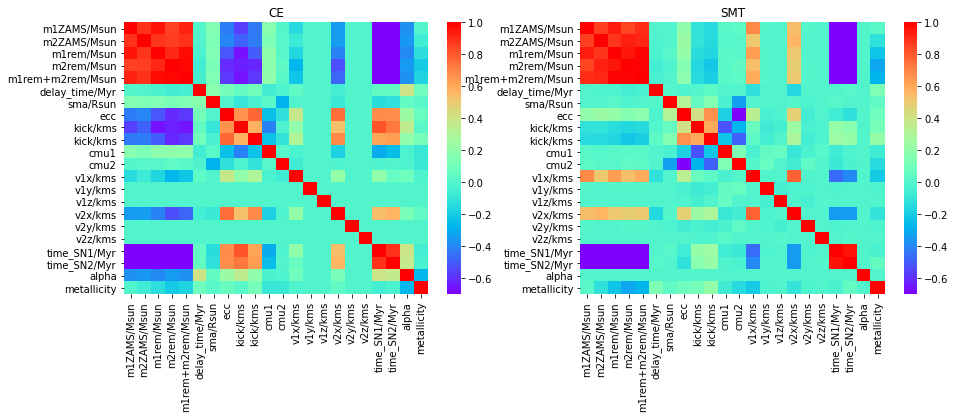

In [8]:
_, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.heatmap(data_CE.corr(), cmap='rainbow', vmin=-0.7, vmax=1,ax=ax1);
sns.heatmap(data_SMT.corr(), cmap='rainbow',vmin=-0.7, vmax=1, ax=ax2);
ax1.set_title('CE')
ax2.set_title('SMT');

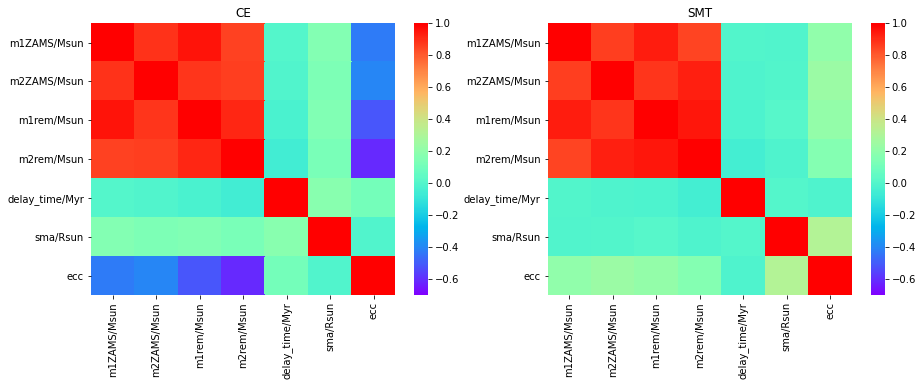

In [9]:
_, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.heatmap(data_CE[most_imp_features].corr(), cmap='rainbow', vmin=-0.7, vmax=1,ax=ax1);
sns.heatmap(data_SMT[most_imp_features].corr(), cmap='rainbow',vmin=-0.7, vmax=1, ax=ax2);
ax1.set_title('CE')
ax2.set_title('SMT');

#### From the correlation plots we can see that the features that are most correlated between each other are:

#### Directly correlated in CE

- m1ZAMS/Msun and m2ZAMS/Msun

- m1rem/Msun	and m2rem/Msun

#### Inversely correlated in CE

- m1ZAMS/Msun, m2ZAMS/Msun m1rem/Msun, m2rem/Msun, and ecc

#### Directly correlated in SMT

- m1ZAMS/Msun and m2ZAMS/Msun

- m1rem/Msun	and m2rem/Msun


#### Mass distribution before and after the process

We want to analyze the mass distribution before and after the process of the two members, 
and see if there are different behaviours from the first and secondary member independently from CE and SMT

In [10]:
def bin_centers(bin_edges):
    return (bin_edges[1:]+bin_edges[:-1])/2

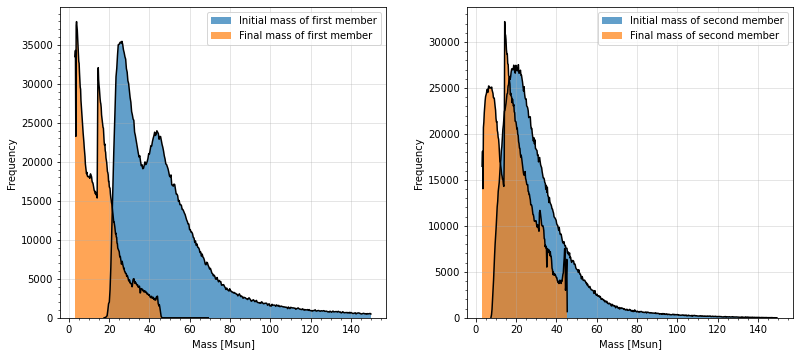

In [11]:
fig1, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,6), sharex = 'row')
fig1.tight_layout(pad=5.0)

mass1init, binmass1init, _ = axs[0].hist(data['m1ZAMS/Msun'], bins='fd', alpha=.7,label='Initial mass of first member') 
mass2init, binmass2init, _ = axs[1].hist(data['m2ZAMS/Msun'], bins='fd', alpha=.7,label='Initial mass of second member')
mass1fin, binmass1fin, _ = axs[0].hist(data['m1rem/Msun'], bins='fd', alpha=.7,label='Final mass of first member') 
mass2fin, binmass2fin, _ = axs[1].hist(data['m2rem/Msun'], bins='fd', alpha=.7,label='Final mass of second member')

axs[0].plot(bin_centers(binmass1init),mass1init, color='black')
axs[0].plot(bin_centers(binmass1fin),mass1fin, color='black')
axs[1].plot(bin_centers(binmass2init),mass2init, color='black')
axs[1].plot(bin_centers(binmass2fin),mass2fin, color='black')

for j in range(2):
        axs[j].set_ylabel('Frequency') 
        axs[j].set_xlabel('Mass [Msun]')
        axs[j].xaxis.set_major_locator(MultipleLocator(20))
        axs[j].xaxis.set_minor_locator(AutoMinorLocator(4))
        axs[j].yaxis.set_major_locator(MultipleLocator(5000))
        axs[j].yaxis.set_minor_locator(AutoMinorLocator(5))
        axs[j].legend()
        axs[j].grid(alpha=.4)
plt.show()

#### Initial and final mass distributions

We now want to visualize the mass distribution between CE and SMT with normalized histograms

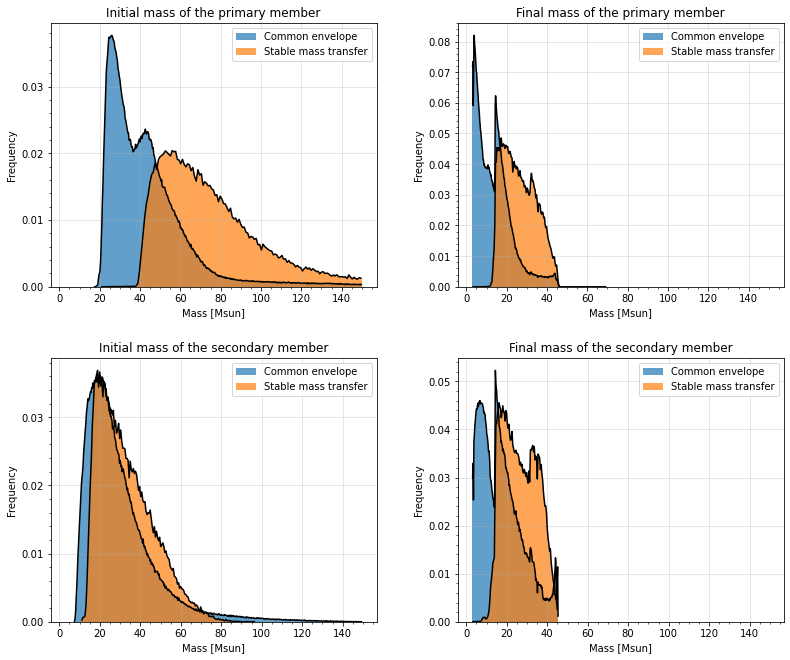

In [12]:
fig1, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,10), sharex = 'row')
fig1.tight_layout(pad=5.0)

out1, bin_ed1, _ = ax[0][0].hist(data_CE['m1ZAMS/Msun'], bins='fd',density = True, alpha=.7, label='Common envelope');
out12, bin_ed12, _ = ax[0][0].hist(data_SMT['m1ZAMS/Msun'], bins='fd',density = True, alpha=.7, label='Stable mass transfer');
ax[0][0].set_title('Initial mass of the primary member')
ax[0][0].plot(bin_centers(bin_ed1), out1, color='black')
ax[0][0].plot(bin_centers(bin_ed12), out12, color='black')

out2, bin_ed2, _ = ax[0][1].hist(data_CE['m1rem/Msun'], bins='fd', density = True, alpha=.7, label='Common envelope');
out22, bin_ed22, _ = ax[0][1].hist(data_SMT['m1rem/Msun'], bins='fd', density = True, alpha=.7, label='Stable mass transfer');
ax[0][1].set_title('Final mass of the primary member')
ax[0][1].plot(bin_centers(bin_ed2), out2, color='black')
ax[0][1].plot(bin_centers(bin_ed22), out22, color='black')

out3, bin_ed3, _ = ax[1][0].hist(data_CE['m2ZAMS/Msun'], bins='fd',density = True, alpha=.7, label='Common envelope');
out32, bin_ed32, _ = ax[1][0].hist(data_SMT['m2ZAMS/Msun'], bins='fd',density = True, alpha=.7, label='Stable mass transfer');
ax[1][0].set_title('Initial mass of the secondary member')
ax[1][0].plot(bin_centers(bin_ed3), out3, color='black')
ax[1][0].plot(bin_centers(bin_ed32), out32, color='black')

out3, bin_ed3, _ = ax[1][1].hist(data_CE['m2rem/Msun'], bins='fd',density = True, alpha=.7, label='Common envelope');
out32, bin_ed32, _ = ax[1][1].hist(data_SMT['m2rem/Msun'], bins='fd',density = True, alpha=.7, label='Stable mass transfer');
ax[1][1].set_title('Final mass of the secondary member')
ax[1][1].plot(bin_centers(bin_ed3), out3, color='black')
ax[1][1].plot(bin_centers(bin_ed32), out32, color='black')

for i in range(2):
    for j in range(2):
        ax[i][j].set_ylabel('Frequency') 
        ax[i][j].set_xlabel('Mass [Msun]')
        ax[i][j].xaxis.set_major_locator(MultipleLocator(20))
        ax[i][j].xaxis.set_minor_locator(AutoMinorLocator(4))
        ax[i][j].yaxis.set_major_locator(MultipleLocator(0.01))
        ax[i][j].yaxis.set_minor_locator(AutoMinorLocator(5))
        ax[i][j].legend()
        ax[i][j].grid(alpha=.4)

### Interpretation of plots

We now want to visualize the mass distribution between CE and SMT with normalized histograms.

#### Primary Member

- The initial mass for the primary member has a higher stable mass transfer mean than the common envelope.

- The shape of the pdfs remain the same, but there is a loss of mass during the process

- There are two sharper peaks in the pdf for the CE and a wider tail for the SMT

#### Secondary Member

- The initial mass for the secondary member has a similar stable mass transfer mean as the common envelope. 

- For the secondary member, they start from a similar mean of the distribution and end up with a sensible difference in their mean


In [13]:
data_list=[data_CE,data_SMT]
#creater dictionary w/ most important features and combinations
CE={
    "M1":data_list[0]['m1ZAMS/Msun'],
    "M2":data_list[0]['m2ZAMS/Msun'],
    "m1":data_list[0]['m1rem/Msun'],
    "m2":data_list[0]['m2rem/Msun'],
    "t":data_list[0]['delay_time/Myr'],
    "a":data_list[0]['sma/Rsun'],
    "e":data_list[0]['ecc'],
     "massloss1":(data_list[0]['m1ZAMS/Msun']-data_list[0]['m1rem/Msun'])/data_list[0]['m1ZAMS/Msun'],
    "massloss2":(data_list[0]['m2ZAMS/Msun']-data_list[0]['m2rem/Msun'])/data_list[0]['m2ZAMS/Msun'],
    "area":np.pi*(data_list[0]["sma/Rsun"]**2)*data_list[0]["ecc"]
}

SMT={
    "M1":data_list[1]['m1ZAMS/Msun'],
    "M2":data_list[1]['m2ZAMS/Msun'],
    "m1":data_list[1]['m1rem/Msun'],
    "m2":data_list[1]['m2rem/Msun'],
    "t":data_list[1]['delay_time/Myr'],
    "a":data_list[1]['sma/Rsun'],
    "e":data_list[1]['ecc'],
    "massloss1":(data_list[1]['m1ZAMS/Msun']-data_list[1]['m1rem/Msun'])/data_list[1]['m1ZAMS/Msun'],
    "massloss2":(data_list[1]['m2ZAMS/Msun']-data_list[1]['m2rem/Msun'])/data_list[1]['m2ZAMS/Msun'],
    "area":np.pi*(data_list[1]["sma/Rsun"]**2)*data_list[1]["ecc"]
}

diff1CE=CE['M1']-CE['m1']
diff2CE=CE['M2']-CE['m2']
diff1SMT=SMT['M1']-SMT['m1']
diff2SMT=SMT['M2']-SMT['m2']
qCE=CE['M2']/CE['M1']
qSMT=SMT['M2']/SMT['M1']
qremCE=CE['m2']/CE['m1']
qremSMT=SMT['m2']/SMT['m1']
#add to the datasets new columns
data_CE['diff1CE']=diff1CE
data_CE['diff2CE']=diff2CE
data_SMT['diff1SMT']=diff1SMT
data_SMT['diff2SMT']=diff2SMT
data_CE['qCE']=qCE
data_SMT['qSMT']=qSMT
data_CE['qremCE']=qremCE
data_SMT['qremSMT']=qremSMT


#check if q < 5/6 for SMT
q_mean=np.mean(qSMT)
print('Number of events with q > 5/6:','\t',len(qSMT)-len(qSMT[qSMT<5/6]))


Number of events with q > 5/6: 	 94


### Mass Ratio, Eccentricity, Delay Time

<ipython-input-14-fcda2d581678>:42: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('masses.jpg')


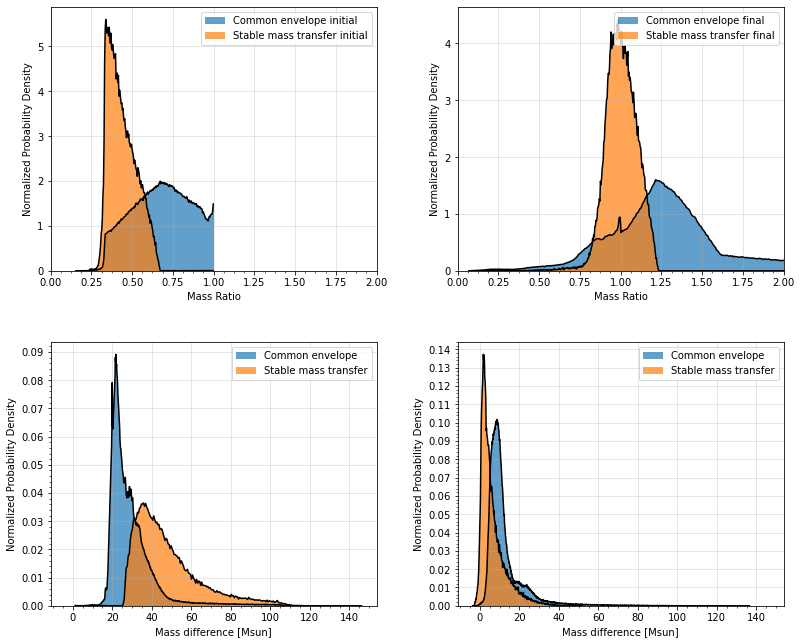

In [14]:
fig2, ax = plt.subplots(2,2, figsize=(12,10), sharex = 'row')
fig2.tight_layout(pad=5.0)

outqCE, binqCE, _ = ax[0][0].hist(qCE, bins='auto', alpha=.7, density=True, label='Common envelope initial');
outqSMT, binqSMT, _ = ax[0][0].hist(qSMT, bins='auto', alpha=.7, density=True, label='Stable mass transfer initial');
ax[0][0].set_xlabel('Mass Ratio')
ax[0][0].plot(bin_centers(binqCE), outqCE, color='black')
ax[0][0].plot(bin_centers(binqSMT), outqSMT, color='black')
ax[0][0].set_xlim(0,2)

outqremCE, binqremCE, _ = ax[0][1].hist(qremCE, bins='auto', alpha=.7, density=True, label='Common envelope final');
outqremSMT, binqremSMT, _ = ax[0][1].hist(qremSMT, bins='auto', alpha=.7, density=True, label='Stable mass transfer final');
ax[0][1].set_xlabel('Mass Ratio')
ax[0][1].plot(bin_centers(binqremCE), outqremCE, color='black')
ax[0][1].plot(bin_centers(binqremSMT), outqremSMT, color='black')
ax[0][1].set_xlim(0,2)

outdiff1CE, bindiff1CE, _ = ax[1][0].hist(diff1CE, bins='auto', alpha=.7, density=True, label='Common envelope');
outdiff1SMT, bindiff1SMT, _ = ax[1][0].hist(diff1SMT, bins='auto', alpha=.7, density=True, label='Stable mass transfer');
#ax[1][0].set_title('Mass difference for primary member [Msun]')
ax[1][0].plot(bin_centers(bindiff1CE), outdiff1CE, color='black')
ax[1][0].plot(bin_centers(bindiff1SMT), outdiff1SMT, color='black')

outdiff2CE, bindiff2CE, _ = ax[1][1].hist(diff2CE, bins='auto', alpha=.7, density=True, label='Common envelope');
outdiff2SMT, bindiff2SMT, _ = ax[1][1].hist(diff2SMT, bins='auto', alpha=.7, density=True, label='Stable mass transfer');
#ax[1][1].set_title('Mass difference for secondary member [Msun]')
ax[1][1].plot(bin_centers(bindiff2CE), outdiff2CE, color='black')
ax[1][1].plot(bin_centers(bindiff2SMT), outdiff2SMT, color='black')

for i in range(2):
    for j in range(2):
        ax[i][j].set_ylabel('Normalized Probability Density') 
        ax[1][j].set_xlabel('Mass difference [Msun]')
        ax[0][j].xaxis.set_major_locator(MultipleLocator(0.25))
        ax[1][j].xaxis.set_major_locator(MultipleLocator(20))
        ax[0][j].xaxis.set_minor_locator(AutoMinorLocator(4))
        ax[i][j].xaxis.set_minor_locator(AutoMinorLocator(4))
        ax[1][j].yaxis.set_major_locator(MultipleLocator(0.01))
        ax[1][j].yaxis.set_minor_locator(AutoMinorLocator(5))
        ax[i][j].legend()
        ax[i][j].grid(alpha=.4)
plt.savefig('masses.jpg')       

max t: 	 13999.4404 	 13999.9219


/home/marco/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


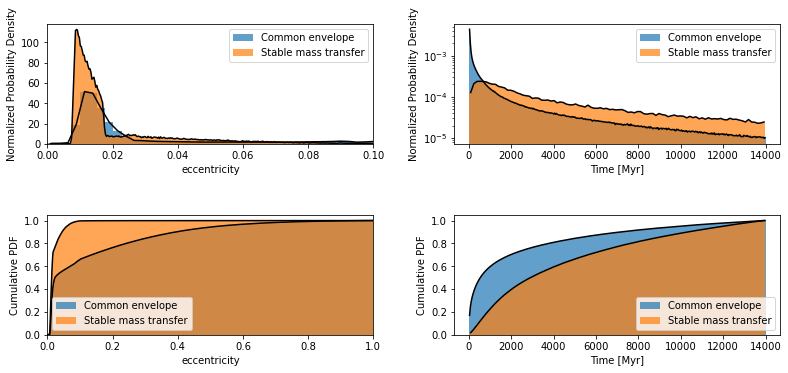

In [15]:
fig1, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,6))
fig1.tight_layout(pad=5.0)

oute1, bine1, _ = ax[0][0].hist(CE['e'], bins='auto', alpha=.7, density=True, label='Common envelope');
oute2, bine2, _ = ax[0][0].hist(SMT['e'], bins='auto', alpha=.7, density=True, label='Stable mass transfer');
#ax[0][0].set_title('eccentrity')
ax[0][0].plot(bin_centers(bine1), oute1, color='black')
ax[0][0].plot(bin_centers(bine2), oute2, color='black')
ax[0][0].set_xlim(0,0.1)
ax[0][0].set_xlabel('eccentricity')
ax[0][0].set_ylabel('Normalized Probability Density')


outt1, bint1, _ = ax[0][1].hist(CE['t'], bins='auto', alpha=.7, density=True, label='Common envelope');
outt2, bint2, _ = ax[0][1].hist(SMT['t'], bins='auto', alpha=.7, density=True, label='Stable mass transfer');
#ax[0][1].set_title('Delay time')
ax[0][1].plot(bin_centers(bint1), outt1, color='black')
ax[0][1].plot(bin_centers(bint2), outt2, color='black')
ax[0][1].set_xlabel('Time [Myr]')
ax[0][1].set_ylabel('Normalized Probability Density')
#ax[0][1].set_xscale('log')
ax[0][1].set_yscale('log')
#CE brings members closer due to spiral in, shorter formation time for BBH. Is it within a hubble time?
print('max t:','\t',SMT['t'].max(),'\t', CE['t'].max())

out1, bin1, _ = ax[1][0].hist(CE['e'], bins='auto', alpha=.7, cumulative=True, density=True, label='Common envelope');
out2, bin2, _ = ax[1][0].hist(SMT['e'], bins='auto', alpha=.7, cumulative=True, density=True, label='Stable mass transfer');
#ax[1][0].set_title('Cumulative sum of eccentrity')
ax[1][0].plot(bin_centers(bin1), out1, color='black')
ax[1][0].plot(bin_centers(bin2), out2, color='black')
ax[1][0].set_xlim(0,1)
ax[1][0].set_xlabel('eccentricity')
ax[1][0].set_ylabel('Cumulative PDF')

out11, bin11, _ = ax[1][1].hist(CE['t'], bins='auto', alpha=.7, cumulative=True, density=True, label='Common envelope');
out12, bin12, _ = ax[1][1].hist(SMT['t'], bins='auto', alpha=.7, cumulative=True, density=True, label='Stable mass transfer');
 #ax[1][1].set_title('Cumulative sum of delay time')
ax[1][1].plot(bin_centers(bin11), out11, color='black')
ax[1][1].plot(bin_centers(bin12), out12, color='black')
ax[1][1].set_xlabel('Time [Myr]')
ax[1][1].set_ylabel('Cumulative PDF')

#eccentricity for SMT is ~0

for i in range(2):
    for j in range (2):
        ax[j][i].legend()
    

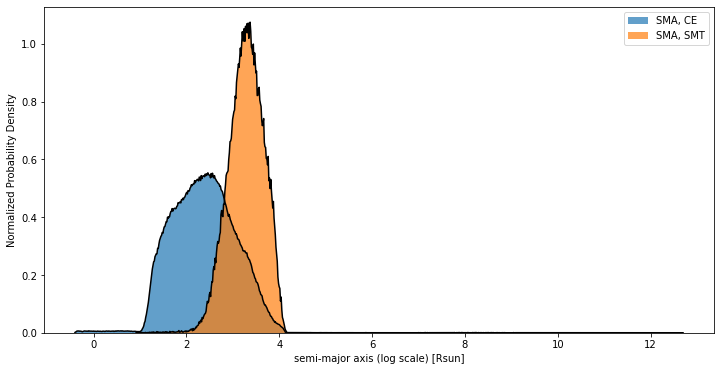

In [16]:
fig, ax = plt.subplots(figsize=(12,6))
area_ce, binarea_ce, _ = ax.hist(np.log(data_CE['sma/Rsun']),bins='fd', alpha=.7, density=True,label='SMA, CE')
area_smt, binarea_smt, _ = ax.hist(np.log(data_SMT['sma/Rsun']),bins='fd', alpha=.7, density=True,label='SMA, SMT')
ax.plot(bin_centers(binarea_ce),area_ce, color='black')
ax.plot(bin_centers(binarea_smt),area_smt, color='black')
ax.set_xlabel('semi-major axis (log scale) [Rsun]')
ax.set_ylabel('Normalized Probability Density')
ax.legend()

# Data manipulation and splitting

In [17]:
# using 1% of overall dataset and keeping only the most important features + alpha and metallicity

train, test = train_test_split(data, test_size=0.99) 
y_train, y_test = train['CE'], test['CE']

#drop CE column
x_train = train.drop(columns='CE')
x_test = test.drop(columns='CE')

#x_train = train.drop(train.columns[np.arange(10,21)],axis = 1)
#x_train = x_train.drop(columns='m1rem+m2rem/Msun')

#x_test = test.drop(test.columns[np.arange(10,21)],axis = 1)
#x_test = x_test.drop(columns='m1rem+m2rem/Msun')

x_train.head()

,m1ZAMS/Msun,m2ZAMS/Msun,m1rem/Msun,m2rem/Msun,m1rem+m2rem/Msun,delay_time/Myr,sma/Rsun,ecc,kick/kms,kick/kms,...,v1x/kms,v1y/kms,v1z/kms,v2x/kms,v2y/kms,v2z/kms,time_SN1/Myr,time_SN2/Myr,alpha,metallicity
2583482,51.6663,39.6473,19.1656,28.0471,47.2127,5903.7124,31.1380,0.010590,0.0000,0.0000,...,1.926,0.000,0.000,2.311,0.000000,-0.000,4.927,6.898,5.0,0.0004
2769297,56.6302,25.7610,20.7910,21.8828,42.6738,11722.4424,34.7190,0.011722,0.0000,0.0000,...,2.090,-0.000,0.000,2.763,-0.000016,-0.000,4.716,7.892,5.0,0.0008
2446067,21.8602,14.2941,3.5733,5.9758,9.5491,2757.4714,9.2282,0.430960,101.2089,15.9577,...,26.720,0.158,-9.068,84.910,-8.511000,4.384,9.800,15.430,5.0,0.0002
2629790,85.0011,30.0390,33.6982,31.0759,64.7741,7685.8447,42.5960,0.007719,0.0000,0.0000,...,4.435,0.000,-0.000,2.162,-0.000000,-0.000,3.978,6.956,5.0,0.0004
2565888,62.4610,21.4515,18.1493,16.2420,34.3913,4114.4072,22.5800,0.014539,0.0000,0.0000,...,2.509,0.000,-0.000,4.134,0.000000,-0.000,4.529,8.121,5.0,0.0040


Checking frequency in training set

In [18]:
#check metallicity/alpha proportions
#verify alpha and metallicity are uniformly taken from the original dataset

met_freq = x_train.groupby('metallicity').count()['ecc']/data.groupby('metallicity').count()['ecc']
alpha_freq = x_train.groupby('alpha').count()['ecc']/data.groupby('alpha').count()['ecc']
print('Frequency of metallicity and alpha in percentage: ')
display(met_freq*100)
display(alpha_freq*100)

Frequency of metallicity and alpha in percentage: 


metallicity
0.0002    0.998830
0.0004    1.000892
0.0008    0.979679
0.0012    1.022392
0.0016    1.014839
0.0020    1.010323
0.0040    0.931046
0.0060    0.860819
0.0080    0.977135
0.0120    0.909918
0.0160    1.455767
0.0200    0.470588
Name: ecc, dtype: float64

alpha
0.5    0.996958
1.0    1.001192
3.0    1.007461
5.0    0.990592
Name: ecc, dtype: float64

# ML algortihms

## Dataset with all the features

In [19]:
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.xlabel("Importance [%]")
    plt.show()

### Random Forest

We use random forest since it's one of the most efficient supervised learning algorithm, we are using it for its simplicity, easy implementation, the goal is to understand which are the most important features. 

In [20]:
#cross validation
#n_estimators = 100 (by default)
parameters = { 'max_depth': [10, None], 'min_samples_split':[2,4,8]} 

RF = RandomForestClassifier(random_state = 0)

grid = GridSearchCV(RF, parameters, cv=5)
grid.fit(x_train,y_train)

print ('RESULTS FOR RF\n')

print("Best parameters set found:")
print(grid.best_params_)
print(grid.best_estimator_)

print("Score with best parameters:")
RF = RandomForestClassifier(random_state = 0, max_depth=grid.best_params_['max_depth'], min_samples_split=grid.best_params_['min_samples_split'])
RF.fit(x_train,y_train)

print("\nAll scores on the grid:")
pred_y = RF.predict(x_test)

print(metrics.classification_report(y_test, pred_y))

RESULTS FOR RF

Best parameters set found:
{'max_depth': None, 'min_samples_split': 2}
RandomForestClassifier(random_state=0)
Score with best parameters:

All scores on the grid:
              precision    recall  f1-score   support

       False       0.98      0.98      0.98    408404
        True       1.00      1.00      1.00   2525538

    accuracy                           0.99   2933942
   macro avg       0.99      0.99      0.99   2933942
weighted avg       0.99      0.99      0.99   2933942



In [21]:
# Calculate errors
scotra = RF.score(x_train,y_train)
scotest = RF.score(x_test,y_test)
# Print training and test errors
train_err = 1 - scotra
print("Training error = ", round(train_err, 2))
test_err = 1 - scotest
print("Test error = " , round(test_err, 2))

Training error =  0.0
Test error =  0.01


(22,)
Variable: m2ZAMS/Msun          Importance: 0.15
Variable: v1x/kms              Importance: 0.11
Variable: time_SN1/Myr         Importance: 0.1
Variable: m1ZAMS/Msun          Importance: 0.09
Variable: m1rem/Msun           Importance: 0.09
Variable: time_SN2/Myr         Importance: 0.09
Variable: sma/Rsun             Importance: 0.07
Variable: m2rem/Msun           Importance: 0.04
Variable: delay_time/Myr       Importance: 0.04
Variable: v1y/kms              Importance: 0.04
Variable: m1rem+m2rem/Msun     Importance: 0.03
Variable: ecc                  Importance: 0.03
Variable: v2x/kms              Importance: 0.03
Variable: kick/kms             Importance: 0.02
Variable: alpha                Importance: 0.02
Variable: kick/kms             Importance: 0.01
Variable: cmu1                 Importance: 0.01
Variable: v2y/kms              Importance: 0.01
Variable: metallicity          Importance: 0.01
Variable: cmu2                 Importance: 0.0
Variable: v1z/kms              Impor

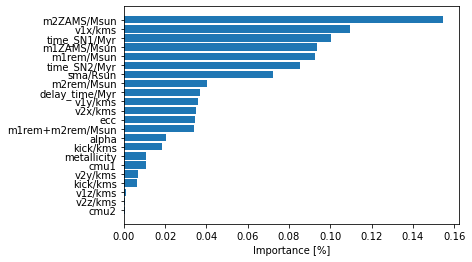

In [22]:
# Get numerical feature importances
importances = list(RF.feature_importances_)
feature_list = x_train.columns
print(np.shape(feature_list))

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = np.array(sorted(feature_importances, key = lambda x: x[1], reverse = True))

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

f_importances(importances, feature_list)

<ipython-input-23-bcd22faa0cfc>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


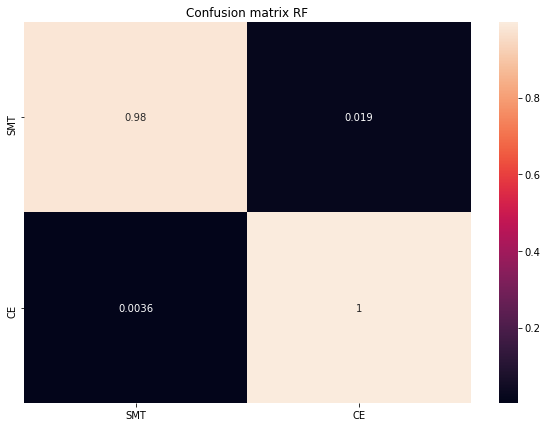

In [23]:
# Heatmap representing the confusion matrix for our predictions

# On the diagonal we have the right predictions, while on the antidiagonal we have the percentage of miscassified samples
u, counts = np.unique(y_test, return_counts=True)
import seaborn as sn
plt.figure(figsize=(10,7))
plt.title('Confusion matrix RF')

sn.heatmap(metrics.confusion_matrix(y_test, pred_y)/counts[:,None], annot=True);

ax = plt.subplot()
ax.xaxis.set_ticklabels(['SMT', 'CE']); 
ax.yaxis.set_ticklabels(['SMT', 'CE']);


In [24]:
# Average depth of a tree of the Random forest to determine the complexity of the rf algorithm
depths=np.array([estimator.tree_.max_depth for estimator in RF.estimators_])
depths.mean()

20.04

### Support Vector Machine (SVM)

We use SVM to first determine whether the dataset is linearly separable and secondly is another ML algorithm
that we can use to determine the most important features for classifications

In [25]:
#cross validation (default 5-fold cross validation) to find the best hyper-parameter C (regularization parameter). 
#The strength of the regularization is inversely proportional to C. 

svm = LinearSVC(dual=False)
param = {'C':[0.1, 1, 10, 100]}
cv = GridSearchCV(svm, param_grid=param)
cv.fit(x_train, y_train)
C_best = cv.best_params_['C']
print('Best C:', C_best)

Best C: 10


In [26]:
svm = LinearSVC(C=C_best, dual=False)
svm.fit(x_train, y_train)
train_error = 1-svm.score(x_train, y_train)
test_error = 1-svm.score(x_test, y_test)
print('Train error:', round(train_error,3))
print('Test error:', round(test_error,3))
pred_y = svm.predict(x_test)

Train error: 0.021
Test error: 0.021


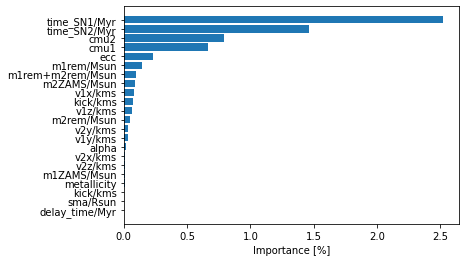

In [27]:
f_importances(np.abs(svm.coef_[0,:]), x_train.columns.to_list())

<ipython-input-28-bcd22faa0cfc>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


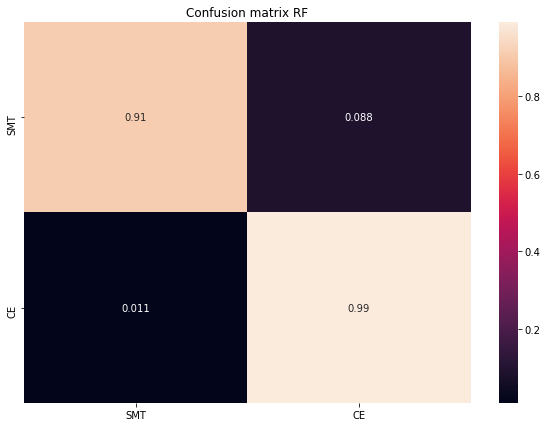

In [28]:
# Heatmap representing the confusion matrix for our predictions

# On the diagonal we have the right predictions, while on the antidiagonal we have the percentage of miscassified samples
u, counts = np.unique(y_test, return_counts=True)
import seaborn as sn
plt.figure(figsize=(10,7))
plt.title('Confusion matrix RF')

sn.heatmap(metrics.confusion_matrix(y_test, pred_y)/counts[:,None], annot=True);

ax = plt.subplot()
ax.xaxis.set_ticklabels(['SMT', 'CE']); 
ax.yaxis.set_ticklabels(['SMT', 'CE']);

## Most relevant features mentioned by prof. Mapelli (see pdf file)

In [29]:
x_train = train[most_imp_features+['alpha', 'metallicity']]
x_test = test[most_imp_features+['alpha', 'metallicity']]

x_train.head()

,m1ZAMS/Msun,m2ZAMS/Msun,m1rem/Msun,m2rem/Msun,delay_time/Myr,sma/Rsun,ecc,alpha,metallicity
2583482,51.6663,39.6473,19.1656,28.0471,5903.7124,31.1380,0.010590,5.0,0.0004
2769297,56.6302,25.7610,20.7910,21.8828,11722.4424,34.7190,0.011722,5.0,0.0008
2446067,21.8602,14.2941,3.5733,5.9758,2757.4714,9.2282,0.430960,5.0,0.0002
2629790,85.0011,30.0390,33.6982,31.0759,7685.8447,42.5960,0.007719,5.0,0.0004
2565888,62.4610,21.4515,18.1493,16.2420,4114.4072,22.5800,0.014539,5.0,0.0040


### RF

In [30]:
#cross validation
#n_estimators = 100 (by default)
parameters = { 'max_depth': [10, None], 'min_samples_split':[2,4,8]} 

RF = RandomForestClassifier(random_state = 0)

grid = GridSearchCV(RF, parameters, cv=5)
grid.fit(x_train,y_train)

print ('RESULTS FOR RF\n')

print("Best parameters set found:")
print(grid.best_params_)
print(grid.best_estimator_)

print("Score with best parameters:")
RF = RandomForestClassifier(random_state = 0, max_depth=grid.best_params_['max_depth'], min_samples_split=grid.best_params_['min_samples_split'])
RF.fit(x_train,y_train)

bestpar=grid.best_params_['max_depth']
print("\nAll scores on the grid:")
pred_y = RF.predict(x_test)

print(metrics.classification_report(y_test, pred_y))

RESULTS FOR RF

Best parameters set found:
{'max_depth': None, 'min_samples_split': 2}
RandomForestClassifier(random_state=0)
Score with best parameters:

All scores on the grid:
              precision    recall  f1-score   support

       False       0.98      0.98      0.98    408404
        True       1.00      1.00      1.00   2525538

    accuracy                           0.99   2933942
   macro avg       0.99      0.99      0.99   2933942
weighted avg       0.99      0.99      0.99   2933942



In [31]:
# Calculate errors
scotra = RF.score(x_train,y_train)
scotest = RF.score(x_test,y_test)
# Print training and test errors
train_err = 1 - scotra
print("Training error = ", round(train_err, 2))
test_err = 1 - scotest
print("Test error = " , round(test_err, 2))

Training error =  0.0
Test error =  0.01


Variable: m2ZAMS/Msun          Importance: 0.28
Variable: m1rem/Msun           Importance: 0.18
Variable: m1ZAMS/Msun          Importance: 0.17
Variable: sma/Rsun             Importance: 0.12
Variable: m2rem/Msun           Importance: 0.08
Variable: ecc                  Importance: 0.07
Variable: delay_time/Myr       Importance: 0.05
Variable: alpha                Importance: 0.04
Variable: metallicity          Importance: 0.02


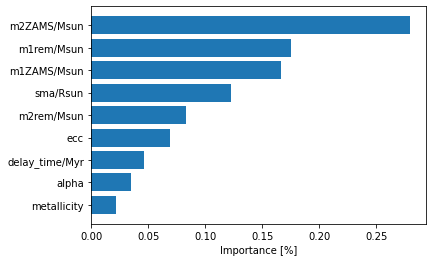

In [32]:
# Get numerical feature importances
importances = list(RF.feature_importances_)
feature_list = x_train.columns

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

f_importances(importances, feature_list)

<ipython-input-33-71aff7820c90>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


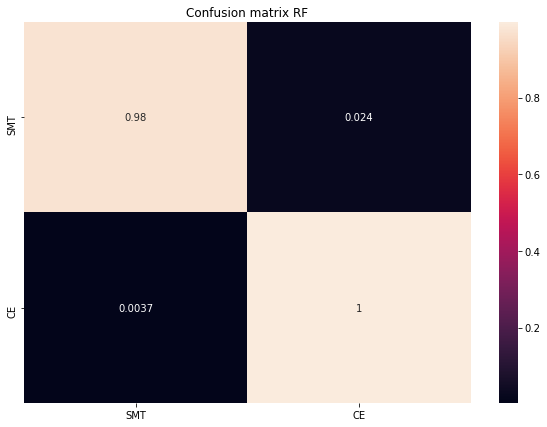

In [33]:
# Heatmap representing the confusion matrix for our predictions

u, counts = np.unique(y_test, return_counts=True)
import seaborn as sn
plt.figure(figsize=(10,7))
plt.title('Confusion matrix RF')

sn.heatmap(metrics.confusion_matrix(y_test, pred_y)/counts[:,None], annot=True);

ax = plt.subplot()
ax.xaxis.set_ticklabels(['SMT', 'CE']); 
ax.yaxis.set_ticklabels(['SMT', 'CE']);

In [34]:
# Average depth of a tree of the Random forest 
depths=np.array([estimator.tree_.max_depth for estimator in RF.estimators_])
depths.mean()

17.29

# Reduced Dataset

We reduce the dimension of the dataset used to train our model discarding the less important variables, retaining only the first 5. 

In [35]:
most_imp_five = [feature_importances[:5][i][0] for i in range(5)]
perc_importance = np.array([feature_importances[:5][i][1] for i in range(5)]).sum()
print(f'These features represent the {perc_importance*100}% of importance of the whole dataset on classification.')

These features represent the 83.0% of importance of the whole dataset on classification.


In [36]:
x_train_small = x_train[most_imp_five]
x_test_small = x_test[most_imp_five]

x_train_small.head()

,m2ZAMS/Msun,m1rem/Msun,m1ZAMS/Msun,sma/Rsun,m2rem/Msun
2583482,39.6473,19.1656,51.6663,31.1380,28.0471
2769297,25.7610,20.7910,56.6302,34.7190,21.8828
2446067,14.2941,3.5733,21.8602,9.2282,5.9758
2629790,30.0390,33.6982,85.0011,42.5960,31.0759
2565888,21.4515,18.1493,62.4610,22.5800,16.2420


### RF

RESULTS FOR RF

Best parameters set found:
{'max_depth': None, 'min_samples_split': 2}
RandomForestClassifier(random_state=0)
Score with best parameters:

All scores on the grid:
              precision    recall  f1-score   support

       False       0.97      0.97      0.97    408404
        True       1.00      1.00      1.00   2525538

    accuracy                           0.99   2933942
   macro avg       0.98      0.98      0.98   2933942
weighted avg       0.99      0.99      0.99   2933942

Training error =  0.0
Test error =  0.01
Variable: m2ZAMS/Msun          Importance: 0.33
Variable: m1ZAMS/Msun          Importance: 0.21
Variable: m1rem/Msun           Importance: 0.18
Variable: sma/Rsun             Importance: 0.16
Variable: m2rem/Msun           Importance: 0.13


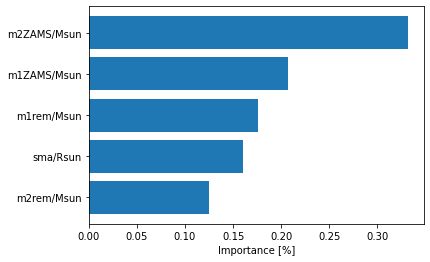

<ipython-input-37-51081c85059a>:59: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()
<ipython-input-37-51081c85059a>:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(['SMT', 'CE']);
<ipython-input-37-51081c85059a>:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_ticklabels(['SMT', 'CE']);


16.54

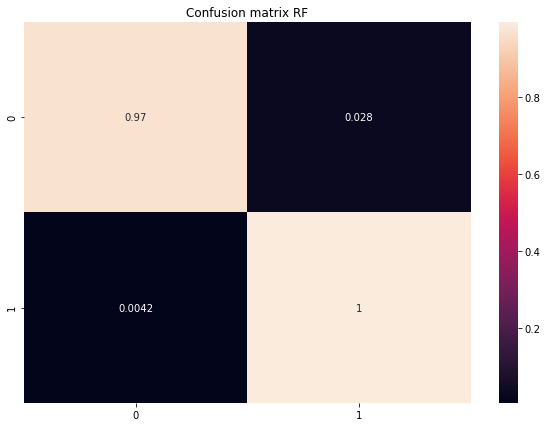

In [37]:
#cross validation
#n_estimators = 100 (by default)
parameters = { 'max_depth': [10, None], 'min_samples_split':[2,4,8]} 

RF = RandomForestClassifier(random_state = 0)

grid = GridSearchCV(RF, parameters, cv=5)
grid.fit(x_train_small,y_train)

print ('RESULTS FOR RF\n')

print("Best parameters set found:")
print(grid.best_params_)
print(grid.best_estimator_)

print("Score with best parameters:")
RF = RandomForestClassifier(random_state = 0, max_depth=grid.best_params_['max_depth'], min_samples_split=grid.best_params_['min_samples_split'])
RF.fit(x_train_small,y_train)

bestpar=grid.best_params_['max_depth']
print("\nAll scores on the grid:")
pred_y = RF.predict(x_test_small)

print(metrics.classification_report(y_test, pred_y))


# Calculate errors
scotra = RF.score(x_train_small,y_train)
scotest = RF.score(x_test_small,y_test)
# Print training and test errors
train_err = 1 - scotra
print("Training error = ", round(train_err, 2))
test_err = 1 - scotest
print("Test error = " , round(test_err, 2))


# Get numerical feature importances
importances = list(RF.feature_importances_)
feature_list = x_train_small.columns

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

f_importances(importances, feature_list)


# Heatmap representing the confusion matrix for our predictions
u, counts = np.unique(y_test, return_counts=True)
import seaborn as sn
plt.figure(figsize=(10,7))
plt.title('Confusion matrix RF')

ax = plt.subplot()
ax.xaxis.set_ticklabels(['SMT', 'CE']); 
ax.yaxis.set_ticklabels(['SMT', 'CE']);

sn.heatmap(metrics.confusion_matrix(y_test, pred_y)/counts[:,None], annot=True);

#legend: CE=1, SMT=0

# Average depth of a tree of the Random forest 
depths=np.array([estimator.tree_.max_depth for estimator in RF.estimators_])
depths.mean()

## Combination of features

Since the primary and secondary masses are linearly dependent, we consider the ratio of the two for the initial and final masses. Besides we define the feature 'area', wich combines the features 'sma/Rsum' (semimajor axis) and 'ecc' (eccentricity). Given the eccentricity $e$ and the semimajor axis $a$ of the orbit, the orbit area $A$ is given by: $$A = \pi a^2 \sqrt{1-e^2}$$

In [38]:
data['massloss1']=(data['m1ZAMS/Msun']-data['m1rem/Msun'])/data['m1ZAMS/Msun']
data['massloss2']=(data['m2ZAMS/Msun']-data['m2rem/Msun'])/data['m2ZAMS/Msun']
data["area"]=np.pi*(data["sma/Rsun"]**2)*np.sqrt(1-data["ecc"]**2)
data['M1/M2init']=data['m1ZAMS/Msun']/data['m2ZAMS/Msun']
data['M1/M2final']=data['m1rem/Msun']/data['m2rem/Msun']

In [39]:
data_CE=data[data['CE']==True]
data_SMT=data[data['CE']==False]
data_CE

,m1ZAMS/Msun,m2ZAMS/Msun,m1rem/Msun,m2rem/Msun,m1rem+m2rem/Msun,delay_time/Myr,sma/Rsun,ecc,kick/kms,kick/kms,...,time_SN1/Myr,time_SN2/Myr,CE,alpha,metallicity,massloss1,massloss2,area,M1/M2init,M1/M2final
0,50.9151,50.8356,4.8001,4.7478,9.5479,2233.6292,7.9524,0.273150,59.6905,73.7586,...,4.945,4.948,True,0.5,0.0200,0.905723,0.906605,191.121036,1.001564,1.011016
1,57.0253,56.9464,5.5849,5.5325,11.1174,1076.5703,9.0222,0.508320,46.6697,26.0927,...,4.705,4.707,True,0.5,0.0200,0.902063,0.902847,220.223058,1.001386,1.009471
2,91.0594,90.7083,8.3787,8.2624,16.6411,6810.4365,14.9810,0.072798,44.9829,32.6183,...,4.068,4.072,True,0.5,0.0200,0.907986,0.908912,703.198018,1.003871,1.014076
4,40.2965,40.2439,3.1045,3.0769,6.1814,8703.5479,13.7630,0.705290,57.8357,131.2023,...,5.603,5.608,True,0.5,0.0200,0.922959,0.923544,421.864180,1.001307,1.008970
5,62.6781,58.8130,7.5024,5.9658,13.4682,2895.4182,10.4610,0.163210,53.5918,36.8037,...,4.505,4.629,True,0.5,0.0200,0.880303,0.898563,339.182613,1.065718,1.257568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2963575,42.0039,18.5497,12.6166,14.3543,26.9709,12026.9111,24.7540,0.018538,8.1496,0.0000,...,5.647,9.599,True,5.0,0.0016,0.699633,0.226171,1924.713129,2.264398,0.878942
2963576,42.2804,17.4243,12.7919,13.7564,26.5483,9666.1709,23.1890,0.048475,4.5797,5.2487,...,5.622,9.746,True,5.0,0.0016,0.697451,0.210505,1687.341761,2.426519,0.929887
2963579,26.1787,9.6897,4.3739,3.1328,7.5067,1593.2186,6.9409,0.455930,71.3269,69.2119,...,8.286,15.490,True,5.0,0.0016,0.832921,0.676688,134.703563,2.701704,1.396163
2963580,28.9126,27.1144,5.8776,14.7098,20.5874,12496.7129,19.4270,0.024287,52.7057,0.0000,...,7.549,9.747,True,5.0,0.0016,0.796711,0.457491,1185.313496,1.066319,0.399570


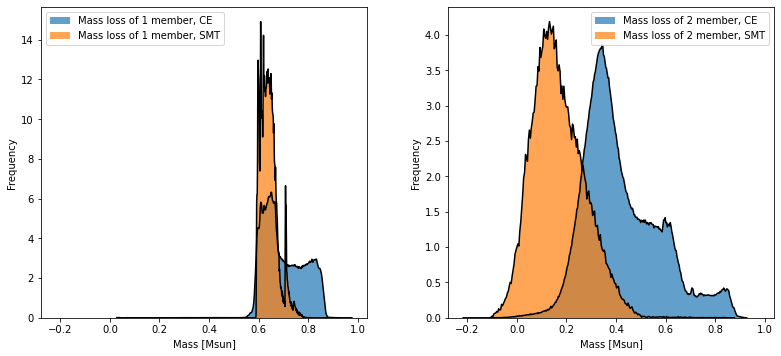

In [40]:
fig1, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,6), sharex = 'row')
fig1.tight_layout(pad=5.0)

mass1init, binmass1init, _ = axs[0].hist(data_CE['massloss1'], bins='fd', density=True, alpha=.7,label='Mass loss of 1 member, CE') 
mass2init, binmass2init, _ = axs[1].hist(data_CE['massloss2'], bins='fd', density=True, alpha=.7,label='Mass loss of 2 member, CE')
mass1fin, binmass1fin, _ = axs[0].hist(data_SMT['massloss1'], bins='fd', density=True,alpha=.7,label='Mass loss of 1 member, SMT') 
mass2fin, binmass2fin, _ = axs[1].hist(data_SMT['massloss2'], bins='fd', density=True,alpha=.7,label='Mass loss of 2 member, SMT')

axs[0].plot(bin_centers(binmass1init),mass1init, color='black')
axs[0].plot(bin_centers(binmass1fin),mass1fin, color='black')
axs[1].plot(bin_centers(binmass2init),mass2init, color='black')
axs[1].plot(bin_centers(binmass2fin),mass2fin, color='black')

for j in range(2):
        axs[j].set_ylabel('Frequency') 
        axs[j].set_xlabel('Mass [Msun]')
        axs[j].legend()
plt.show()

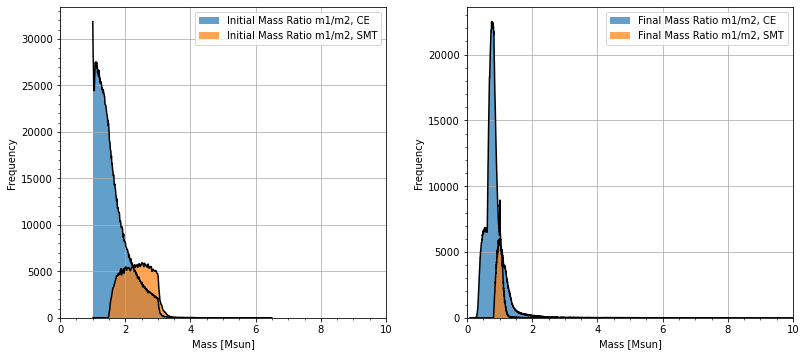

In [41]:
fig1, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,6), sharex = 'row')
fig1.tight_layout(pad=5.0)

initial_mass_ce, initial_binmass_ce, _ = axs[0].hist(data_CE['M1/M2init'], bins='fd', alpha=.7,label='Initial Mass Ratio m1/m2, CE') 
initial_mass_smt, initial_binmass_smt, _ = axs[0].hist(data_SMT['M1/M2init'], bins='fd', alpha=.7,label='Initial Mass Ratio m1/m2, SMT') 
final_mass_ce, final_binmass_ce, _ = axs[1].hist(data_CE['M1/M2final'], bins='fd', alpha=.7,label='Final Mass Ratio m1/m2, CE')
final_mass_smt, final_binmass_smt, _ = axs[1].hist(data_SMT['M1/M2final'], bins='fd', alpha=.7,label='Final Mass Ratio m1/m2, SMT') 

axs[0].plot(bin_centers(initial_binmass_ce),initial_mass_ce, color='black')
axs[0].plot(bin_centers(initial_binmass_smt),initial_mass_smt, color='black')
axs[1].plot(bin_centers(final_binmass_ce),final_mass_ce, color='black')
axs[1].plot(bin_centers(final_binmass_smt),final_mass_smt, color='black')

for j in range(2):
        axs[j].set_ylabel('Frequency') 
        axs[j].set_xlabel('Mass [Msun]')
        axs[j].xaxis.set_major_locator(MultipleLocator(2))
        axs[j].xaxis.set_minor_locator(AutoMinorLocator(4))
        axs[j].yaxis.set_major_locator(MultipleLocator(5000))
        axs[j].yaxis.set_minor_locator(AutoMinorLocator(5))
        axs[j].legend()
        axs[j].grid(True)
        axs[j].set_xlim(0,10)
plt.show()



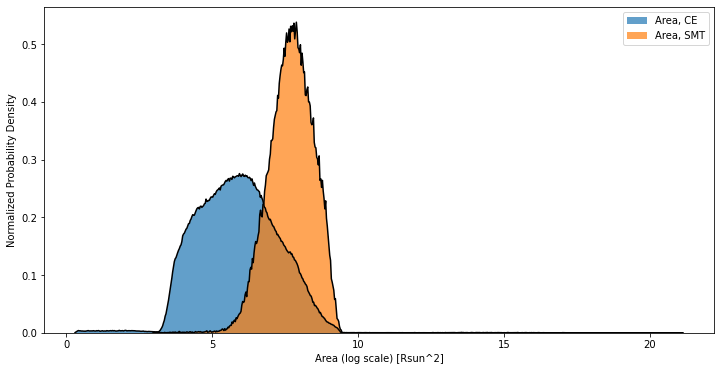

In [42]:
fig, ax = plt.subplots(figsize=(12,6))
area_ce, binarea_ce, _ = ax.hist(np.log(data_CE['area']),bins='fd', alpha=.7, density=True,label='Area, CE')
area_smt, binarea_smt, _ = ax.hist(np.log(data_SMT['area']),bins='fd', alpha=.7, density=True,label='Area, SMT')
ax.plot(bin_centers(binarea_ce),area_ce, color='black')
ax.plot(bin_centers(binarea_smt),area_smt, color='black')
ax.set_xlabel('Area (log scale) [Rsun^2]')
ax.set_ylabel('Normalized Probability Density')
ax.legend()

## Feature combinations dataset

In [43]:
x_train, x_test = train_test_split(data, test_size=0.99) 
y_train, y_test = x_train['CE'], x_test['CE']

x_train = x_train[["area",'M1/M2init','M1/M2final']]
x_test = x_test[["area",'M1/M2init','M1/M2final']]

#define x_train, x_test

x_train.head()

,area,M1/M2init,M1/M2final
370362,486.194993,1.507141,0.832217
478862,282.957082,1.419134,0.779344
785036,2427.613804,1.071991,0.901846
782097,309.425237,1.009406,1.070615
1883108,6504.011543,1.405586,0.812936


### RF

RESULTS FOR RF

Best parameters set found:
{'max_depth': None, 'min_samples_split': 4}
RandomForestClassifier(min_samples_split=4, random_state=0)
Score with best parameters:

All scores on the grid:
              precision    recall  f1-score   support

       False       0.88      0.89      0.88    408514
        True       0.98      0.98      0.98   2525428

    accuracy                           0.97   2933942
   macro avg       0.93      0.93      0.93   2933942
weighted avg       0.97      0.97      0.97   2933942

Training error =  0.0
Test error =  0.03
Variable: area                 Importance: 0.4
Variable: M1/M2init            Importance: 0.34
Variable: M1/M2final           Importance: 0.26


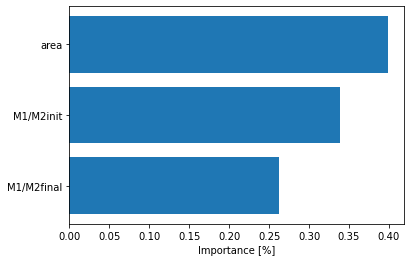

<ipython-input-44-95cc7f89575c>:60: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


26.19

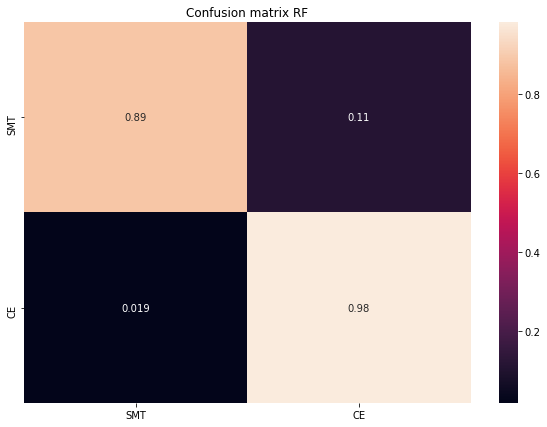

In [44]:
#cross validation
#n_estimators = 100 (by default)
parameters = { 'max_depth': [10, None], 'min_samples_split':[2,4,8]} 

RF = RandomForestClassifier(random_state = 0)

grid = GridSearchCV(RF, parameters, cv=5)
grid.fit(x_train,y_train)

print ('RESULTS FOR RF\n')

print("Best parameters set found:")
print(grid.best_params_)
print(grid.best_estimator_)

print("Score with best parameters:")
RF = RandomForestClassifier(random_state = 0, max_depth=grid.best_params_['max_depth'], min_samples_split=grid.best_params_['min_samples_split'])
RF.fit(x_train,y_train)

bestpar=grid.best_params_['max_depth']
print("\nAll scores on the grid:")
pred_y = RF.predict(x_test)

print(metrics.classification_report(y_test, pred_y))


# Calculate errors
scotra = RF.score(x_train,y_train)
scotest = RF.score(x_test,y_test)
# Print training and test errors
train_err = 1 - scotra
print("Training error = ", round(train_err, 2))
test_err = 1 - scotest
print("Test error = " , round(test_err, 2))


# Get numerical feature importances
importances = list(RF.feature_importances_)
feature_list = x_train.columns

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

f_importances(importances, feature_list)

# Heatmap representing the confusion matrix for our predictions
u, counts = np.unique(y_test, return_counts=True)
import seaborn as sn
plt.figure(figsize=(10,7))
plt.title('Confusion matrix RF')

sn.heatmap(metrics.confusion_matrix(y_test, pred_y)/counts[:,None], annot=True);

ax = plt.subplot()
ax.xaxis.set_ticklabels(['SMT', 'CE']); 
ax.yaxis.set_ticklabels(['SMT', 'CE']);

# Average depth of a tree of the Random forest 
depths=np.array([estimator.tree_.max_depth for estimator in RF.estimators_])
depths.mean()

# K-Means: unsupervised learning

In [45]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(x_train)
 
# Computing the percentage error of our algorithm    
print('Error: ',round(abs(y_test-(1-kmeans.predict(x_test))).sum()/len(y_test)*100,2), '%\n')

# Getting the center of the clusters
cent=kmeans.cluster_centers_
for i in range(0,np.shape(cent)[1]):
    print("Center of ", x_train.columns[i], ": SMT=", round(cent[0][i],2) , "CE=", round(cent[1][i],2))
  

Error:  13.92 %

Center of  area : SMT= 1951.02 CE= 287718852.47
Center of  M1/M2init : SMT= 1.69 CE= 1.42
Center of  M1/M2final : SMT= 0.86 CE= 1.85


In [46]:
datakCE=data[(pow(data['area']-2933986.46,2)+pow(data['M1/M2init']-1.88,2))>(pow(data['area']-1148.51,2)+pow(data['M1/M2init']-1.7,2))]
datakSMT=data[(pow(data['area']-2933986.46,2)+pow(data['M1/M2init']-1.88,2))<(pow(data['area']-1148.51,2)+pow(data['M1/M2init']-1.7,2))]

datakCE2=data[(pow(data['area']-2933986.46,2)+pow(data['M1/M2final']-2.24,2))>(pow(data['area']-1148.51,2)+pow(data['M1/M2final']-0.87,2))]
datakSMT2=data[(pow(data['area']-2933986.46,2)+pow(data['M1/M2final']-2.24,2))<(pow(data['area']-1148.51,2)+pow(data['M1/M2final']-0.87,2))]

datakCE3=data[(pow(data['M1/M2init']-1.88,2)+pow(data['M1/M2final']-2.24,2))>(pow(data['M1/M2init']-1.7,2)+pow(data['M1/M2final']-0.87,2))]
datakSMT3=data[(pow(data['M1/M2init']-1.88,2)+pow(data['M1/M2final']-2.24,2))<(pow(data['M1/M2init']-1.7,2)+pow(data['M1/M2final']-0.87,2))]

dfCE=datakCE[['area','M1/M2init']]
dfSMT=datakSMT[['area','M1/M2init']]

dfCE2=datakCE2[['area','M1/M2final']]
dfSMT2=datakSMT2[['area','M1/M2final']]

dfCE3=datakCE2[['M1/M2init','M1/M2final']]
dfSMT3=datakSMT2[['M1/M2init','M1/M2final']]


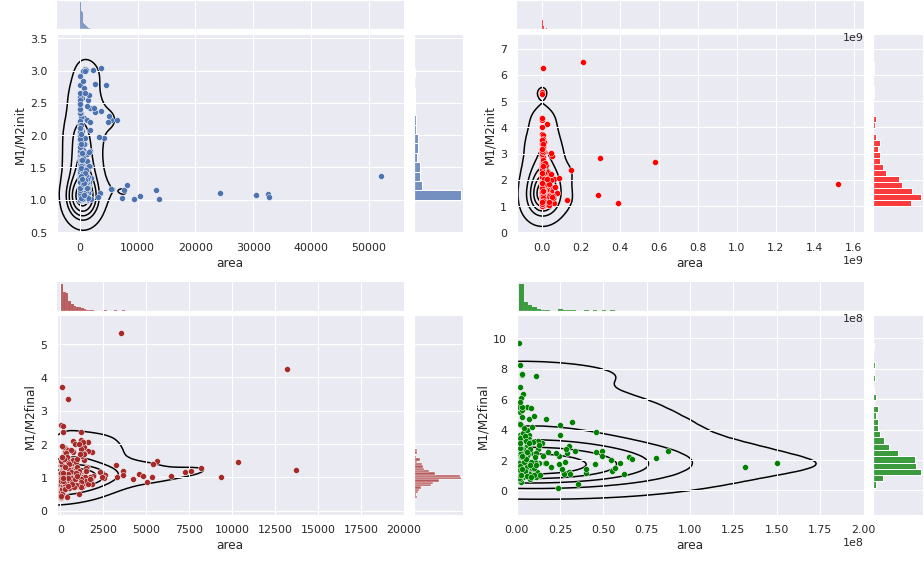

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

class SeabornFig2Grid():

    def __init__(self, seaborngrid, fig,  subplot_spec):
        self.fig = fig
        self.sg = seaborngrid
        self.subplot = subplot_spec
        if isinstance(self.sg, sns.axisgrid.FacetGrid) or \
            isinstance(self.sg, sns.axisgrid.PairGrid):
            self._movegrid()
        elif isinstance(self.sg, sns.axisgrid.JointGrid):
            self._movejointgrid()
        self._finalize()

    def _movegrid(self):
        """ Move PairGrid or Facetgrid """
        self._resize()
        n = self.sg.axes.shape[0]
        m = self.sg.axes.shape[1]
        self.subgrid = gridspec.GridSpecFromSubplotSpec(n,m, subplot_spec=self.subplot)
        for i in range(n):
            for j in range(m):
                self._moveaxes(self.sg.axes[i,j], self.subgrid[i,j])

    def _movejointgrid(self):
        """ Move Jointgrid """
        h= self.sg.ax_joint.get_position().height
        h2= self.sg.ax_marg_x.get_position().height
        r = int(np.round(h/h2))
        self._resize()
        self.subgrid = gridspec.GridSpecFromSubplotSpec(r+1,r+1, subplot_spec=self.subplot)

        self._moveaxes(self.sg.ax_joint, self.subgrid[1:, :-1])
        self._moveaxes(self.sg.ax_marg_x, self.subgrid[0, :-1])
        self._moveaxes(self.sg.ax_marg_y, self.subgrid[1:, -1])

    def _moveaxes(self, ax, gs):
        #https://stackoverflow.com/a/46906599/4124317
        ax.remove()
        ax.figure=self.fig
        self.fig.axes.append(ax)
        self.fig.add_axes(ax)
        ax._subplotspec = gs
        ax.set_position(gs.get_position(self.fig))
        ax.set_subplotspec(gs)

    def _finalize(self):
        plt.close(self.sg.fig)
        self.fig.canvas.mpl_connect("resize_event", self._resize)
        self.fig.canvas.draw()

    def _resize(self, evt=None):
        self.sg.fig.set_size_inches(self.fig.get_size_inches())
        
sns.set(style="darkgrid")

g0=sn.jointplot(data=dfCE[0:500:],x='area',y='M1/M2init')
g0.plot_joint(sns.kdeplot, color="black", zorder=0, levels=6)
#g0.ax_marg_x.set_xlim(0,1)

g1=sn.jointplot(data=dfSMT[0:500:],x='area',y='M1/M2init', color='red')
g1.plot_joint(sns.kdeplot, color="black", zorder=0, levels=6)
#g1.ax_marg_x.set_xlim(0,1)

g2=sn.jointplot(data=dfCE2[0:500:],x='area',y='M1/M2final', color='brown')
g2.plot_joint(sns.kdeplot, color="black", zorder=0, levels=6)
g2.ax_marg_x.set_xlim(-200,20000)
#g2.ax_marg_y.set_ylim(0.5,4)

g3=sn.jointplot(data=dfSMT2[0:500:],x='area',y='M1/M2final', color='green')
g3.plot_joint(sns.kdeplot, color="black", zorder=0, levels=6)
g3.ax_marg_x.set_xlim(-200,200000000)
#g3.ax_marg_y.set_ylim(0.5,4)

fig = plt.figure(figsize=(13,8))
gs = gridspec.GridSpec(2,2)

mg0 = SeabornFig2Grid(g0, fig, gs[0])
mg1 = SeabornFig2Grid(g1, fig, gs[1])
mg2 = SeabornFig2Grid(g2, fig, gs[2])
mg3 = SeabornFig2Grid(g3, fig, gs[3])


gs.tight_layout(fig)

plt.show()

# Neural Network

In [48]:
import sklearn
from sklearn import metrics
print ('scikit-learn version: ', sklearn.__version__)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

parameters = {'hidden_layer_sizes': [(4,6), (20,20,), (30,30,30), (20,50,50,50,20) ]}

mlp = MLPClassifier(max_iter=400, alpha=1e-6, solver='adam', tol=1e-5, random_state=1234,   
                    learning_rate_init=0.01)

grid = GridSearchCV(mlp, parameters, refit = True, cv=5, verbose = 2)
grid.fit(x_train,y_train)

print ('RESULTS FOR NN\n')

print("Best parameters set found:")
print(grid.best_params_)
print(grid.best_estimator_)

scikit-learn version:  0.24.2
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ..........................hidden_layer_sizes=(4, 6); total time=   1.4s
[CV] END ..........................hidden_layer_sizes=(4, 6); total time=   0.9s
[CV] END ..........................hidden_layer_sizes=(4, 6); total time=   0.6s
[CV] END ..........................hidden_layer_sizes=(4, 6); total time=   1.0s
[CV] END ..........................hidden_layer_sizes=(4, 6); total time=   1.2s
[CV] END ........................hidden_layer_sizes=(20, 20); total time=   1.9s
[CV] END ........................hidden_layer_sizes=(20, 20); total time=   1.7s
[CV] END ........................hidden_layer_sizes=(20, 20); total time=   2.0s
[CV] END ........................hidden_layer_sizes=(20, 20); total time=   0.8s
[CV] END ........................hidden_layer_sizes=(20, 20); total time=   0.9s
[CV] END ....................hidden_layer_sizes=(30, 30, 30); total time=   3.3s
[CV] END ..........

Score with best parameters:
0.9377325795806462

All scores on the grid:
              precision    recall  f1-score   support

       False       0.81      0.73      0.77    408514
        True       0.96      0.97      0.96   2525428

    accuracy                           0.94   2933942
   macro avg       0.88      0.85      0.86   2933942
weighted avg       0.94      0.94      0.94   2933942

[[ 297614  110900]
 [  71789 2453639]]


<ipython-input-49-4a47aa384648>:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


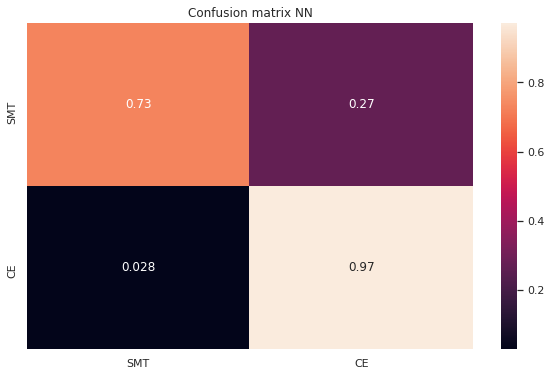

In [49]:
print("Score with best parameters:")
mlp = MLPClassifier(max_iter=400, alpha=1e-4, solver='adam', tol=1e-5, random_state=2,learning_rate_init=0.001
                   ,hidden_layer_sizes=(4,6))
mlp.fit(x_train,y_train)
print(mlp.score(x_test,y_test))
#bestpar=grid.best_params_['hidden_layer_sizes']
print("\nAll scores on the grid:")
pred_y = mlp.predict(x_test)

print(metrics.classification_report(y_test, pred_y))
print(metrics.confusion_matrix(y_test, pred_y))

u, counts = np.unique(y_test, return_counts=True)

import seaborn as sn
plt.figure(figsize=(10,6))
plt.title('Confusion matrix NN')

sn.heatmap(metrics.confusion_matrix(y_test, pred_y)/counts[:,None], annot=True);
ax = plt.subplot()
ax.xaxis.set_ticklabels(['SMT', 'CE']); 
ax.yaxis.set_ticklabels(['SMT', 'CE']);

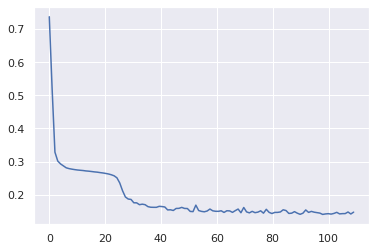

In [50]:
y=mlp.loss_curve_
x=np.linspace(0,len(y),len(y))
plt.plot(x,y);

In [ ]:
import time
from functools import reduce

# Function to compute the number of learnable parameters of a mlp given the size of its hidden layers
def param_count(hl_size):
    tot = 0
    input_size, output_size = x_train.shape[1], 2
    tot += (input_size+1)*hl_size[0]
    for i in range(1,len(hl_size)):
        tot += (hl_size[i-1]+1)*hl_size[i]
    tot += (hl_size[-1]+1)*output_size
    return tot

hl_sizes = [(4,6), (20,), (150,), (3,20), (30,30), (40,20,10,5)]
hl_labels = [param_count(t) for t in hl_sizes]

ti = time.time()
train_acc_list, test_acc_list = [], []
for hl_size in hl_sizes:
    print('Training MLP of size {} ...'.format(hl_size))
    mlp = MLPClassifier(max_iter=200, alpha=1e-4, solver='adam', tol=1e-4, random_state=2,learning_rate_init=.001
                   ,hidden_layer_sizes=hl_size)
    mlp.fit(x_train,y_train) 
    print(mlp.score(x_test,y_test))
    
    train_acc_list.append(mlp.score(x_train, y_train))
    test_acc_list.append(mlp.score(x_test, y_test))
    print('Done, training time: {:.2f} sec\n'.format(time.time()-ti))
    ti = time.time()

fig, ax = plt.subplots(1,2, figsize=(15,5))


ax[0].plot(train_acc_list)
ax[0].set_xlabel('Number of learnable params')
ax[0].set_title('Train accuracy')
ax[0].set_xticks(np.arange(0,len(hl_labels)))
ax[0].set_xticklabels(hl_labels)
ax[0].grid(True)

ax[1].plot(test_acc_list)
ax[1].set_xlabel('Number of learnable params')
ax[1].set_title('Test accuracy')
ax[1].set_xticks(np.arange(0,len(hl_labels)))
ax[1].set_xticklabels(hl_labels)
ax[1].grid(True)



Training MLP of size (4, 6) ...
0.9377325795806462
Done, training time: 7.05 sec

Training MLP of size (20,) ...
0.860635281815387
Done, training time: 2.52 sec

Training MLP of size (150,) ...


### Conclusions

The objective of the project was to obtain the most relevant features used in the classification of BBH in CE and SMT process, and the final features are:

- m2ZAMS/Msun     -     Importance: 0.34

- m1rem/Msun      -     Importance: 0.19

- m1ZAMS/Msun     -     Importance: 0.18

- sma/Rsun        -     Importance: 0.16

- m2rem/Msun      -    Importance: 0.13


We can further simplify the dataset with the following composite features:

- area           -      Importance: 0.41

- M1/M2init      -      Importance: 0.33

- M1/M2final     -     Importance: 0.26

The ML algorithm that gave us the smallest loss was the random forest algorithm, which we used to finally obtain the most important features used for classification.
